<a href="https://colab.research.google.com/github/ExCaLBBR/ExCaLBBR_Projects/blob/main/GeometryBasedDecisions/code/LRrandomizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Find Left-Right randomization for PRaM stimuli presentation

In [35]:
#@title Install dependancies
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from itertools import combinations
import csv

In [36]:
#@title Define Utility Functions
def item_randperm(ntimes, nperm):
    '''
      p = item_randperm(nitems,nperm)
      Parameters: number of items, number of random permutations
      Output: a matrix with nperm rows;
      Each row is an index of permuted item positions.

      returns a matrix (n,nitems)
      each row is a random permutation of nitems (labelled 1:nitems)
      produces n such permutations
      the random seed is changed at every call
    '''

    p = np.zeros((nperm, ntimes))
    for i in range(nperm):
        p[i,:] = np.random.permutation(ntimes)

    return p

In [37]:
#@title Define arbitrary word list

#Sort pairs accoring to prefered combination
words = ['police', 'firefighter', 'neighbors(yours)', 'conservatives(political)', 'liberals(political)', 'healthcare', 'voting', 'immigration', 'religion', 'science', 'anger', 'fear', 'joy', 'love', 'sadness', 'trust']
combinations_list = [list(c) for c in combinations(words, 2)]

In [39]:
#@title Compute worst case left/right simulus presentation statistics
fullLeftList = [c for (c,z) in combinations_list]

wLeftPerc = []
for w in words:
  leftTally = [t for t in fullLeftList if t == w]
  wLeftPerc.append((len(leftTally)/(len(words)-1))*100)
print('mean probability of left position = ', np.mean(wLeftPerc))
print('The probabilities range from', min(wLeftPerc), 'to', max(wLeftPerc))

mean probability of left position =  50.0
The probabilities range from 0.0 to 100.0


The minimum difference is: 13.333333333333336


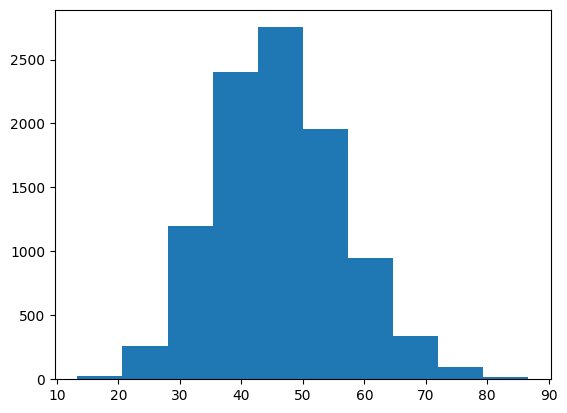

In [46]:
#@title Find gold standard randomization
perm = 10000
e = 0

rangeDist = []

while e != perm:
  LRrandomizer = item_randperm(2, 120)
  reRandomizedList = [[combinations_list[i][0],combinations_list[i][1]] if value[0]==0 else [combinations_list[i][1],combinations_list[i][0]] for i,value in enumerate(LRrandomizer)]

  fullLeftList = [c for (c,z) in reRandomizedList]

  wLeftPerc = []
  for w in words:
    leftTally = [t for t in fullLeftList if t == w]
    wLeftPerc.append((len(leftTally)/(len(words)-1))*100)
  diffMax = max(wLeftPerc)-min(wLeftPerc)
  # print('mean probability of left position = ', np.mean(wLeftPerc))
  # print('The probabilities range from', min(wLeftPerc), 'to', max(wLeftPerc))
  # print('The range value is:', diffMax)
  rangeDist.append(diffMax)
  e = e+1
plt.hist(rangeDist)
print('The minimum difference is: ' + str(min(rangeDist)))

In [ ]:
#@title Find final perm and save output
while diffMax > min(rangeDist):
  LRrandomizer = item_randperm(2, 120)
  reRandomizedList = [[combinations_list[i][0],combinations_list[i][1]] if value[0]==0 else [combinations_list[i][1],combinations_list[i][0]] for i,value in enumerate(LRrandomizer)]

  fullLeftList = [c for (c,z) in reRandomizedList]

  wLeftPerc = []
  for w in words:
    leftTally = [t for t in fullLeftList if t == w]
    wLeftPerc.append((len(leftTally)/(len(words)-1))*100)
  diffMax = max(wLeftPerc)-min(wLeftPerc)
  print('mean probability of left position = ', np.mean(wLeftPerc))
  print('The probabilities range from', min(wLeftPerc), 'to', max(wLeftPerc))
  print('The range value is:', diffMax)